In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
train_df = pd.read_csv('training_set.csv')
test_df = pd.read_csv('first_test_set.csv')
submit_df = pd.read_csv('初赛-submit.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)
print(submit_df.shape)

(480024, 17)
(100000, 17)
(100000, 2)


In [5]:
train_df['first_unit_name'].value_counts()['日照市新环城市建设运营有限公司']

27165

In [4]:
train_df[(train_df.coordinate_y<10)|(train_df.coordinate_y>100)] #好多异常location啊....

,rec_id,create_time,address,event_desc,event_src_name,main_type_name,sub_type_name,district_name,community_name,cell_name,duty_grid_name,coordinate_x,coordinate_y,event_level_name,report_patrol_name,dispose_region_name,first_unit_name
5,140,2019-9-1 14:20:06,太公岛三路山海天消防文化公园(西南92.10米),山海天路：湿地公园内垃圾箱外有垃圾,信息采集员上报,市容环境,暴露垃圾,山海天旅游度假区,碧海路社区,371102005002128,青岛路社区,460470.560783,3.925038e+06,区级,山海天监督员6,山海天旅游度假区,城乡建设管理局
144,437,2019-9-6 08:46:44,63(东北25.90米),自来水井盖破损沉降存在安全隐患。,随手拍,公用设施,水务井盖,东港区,幸福社区,371102002018004,望海社区,457842.876272,3.917957e+06,区级,NaN,东港区,东港区平台
170,485,2019-9-6 11:20:41,日照北路天德南区(附近),日照路：日照路与山东路交口向北约180米路西(烟花爆竹超市西)，路名牌倾斜,随手拍,交通设施,路名牌,东港区,天德社区,371102001020055,天德社区,450317.236051,3.923007e+06,区级,NaN,东港区,东港区平台
173,493,2019-9-6 11:43:16,文登路外贸鞋业(附近),文登路与黄海三路交汇处北100米东侧 公用设施类，水务井盖未关,随手拍,公用设施,水务井盖,东港区,望海社区,371102002011013,望海社区,458090.749833,3.919566e+06,区级,NaN,东港区,东港区平台
174,494,2019-9-6 11:43:21,黄海一路海纳商城,黄海一路北侧海纳商城门口消防设施损坏,随手拍,公用设施,消防设施1,东港区,林海社区,371102002015032,望海社区,456796.720000,3.918489e+06,区级,NaN,东港区,东港区平台
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78702,152563,2020-4-20 16:42:37,日照市东营路东段太公岛工贸公司东北189米(东北179米),莱顿小镇二期西北角沿街有散落石块,信息采集员上报,市容环境,道路不洁,东港区,观海社区,371102004017084,观海社区,115.514121,3.233881e-04,街道,王梓婷,东港区,秦楼街道
78703,152564,2020-4-20 16:44:13,日照市昭阳路337号日照市第3人民医院(东北7米),昭阳路与滨州路南100米路西到堆放石块垃圾袋。,信息采集员上报,市容环境,乱堆物堆料,高新区,高新社区,371102006002148,高新社区,115.514121,3.234115e-04,街道,朱涵,高新区,高新区
78707,152570,2020-4-20 16:51:13,日照市粮全其美手抓饼第3人民医院店西北107.0米(西北107米),昭阳路与高新二路西60米路南墙体小非法小广告过高无法处理。,信息采集员上报,宣传广告,非法小广告,高新区,高新社区,371102006002183,高新社区,115.514121,3.234014e-04,街道,朱涵,高新区,高新区
78712,152578,2020-4-20 16:56:02,日照市玉泉全羊(东北11米),昭阳路与高新二路南30米路西道路。裸露电缆,信息采集员上报,公用设施,通信交接箱、电力设施、电力设施标识牌等,高新区,高新社区,371102006002193,高新社区,115.514121,3.233977e-04,街道,朱涵,高新区,高新区


In [5]:
test_df[(test_df.coordinate_y<10)|(test_df.coordinate_y>100)] #测试集居然没有异常location...

,rec_id,create_time,address,event_desc,event_src_name,main_type_name,sub_type_name,district_name,community_name,cell_name,duty_grid_name,coordinate_x,coordinate_y,event_level_name,report_patrol_name,dispose_region_name,first_unit_name


In [6]:
clean_tr = train_df[(train_df.coordinate_y>10)&(train_df.coordinate_y<100)] #去掉训练集中异常location
small_train_df = clean_tr.sample(frac=0.2) #避免把笔记本跑崩了

In [7]:
data_ratio = clean_tr.shape[0]/test_df.shape[0]
print(data_ratio)

4.64536


1. Basic EDA

In [8]:
for i,col in enumerate(train_df.columns):
    print(col,':',train_df.iloc[0,i])
    ###文字特征居多，需要观察一下分布
    
cate_fea = ['event_src_name','main_type_name','sub_type_name','district_name','community_name','duty_grid_name','event_level_name','report_patrol_name','dispose_region_name']
locate_fea = ['coordinate_x','coordinate_y']

rec_id : 94
create_time : 2019-8-28 11:27:28
address : 海天一路碧海佳园(正北48.38米)
event_desc : 海天一路碧海家园道路不结
event_src_name : 信息采集员上报
main_type_name : 市容环境
sub_type_name : 暴露垃圾
district_name : 山海天旅游度假区
community_name : 碧海路社区
cell_name : 371102005002202
duty_grid_name : 碧海路社区
coordinate_x : 119.566130046504
coordinate_y : 35.4459271003987
event_level_name : 区级
report_patrol_name : 山海天监督员
dispose_region_name : 山海天旅游度假区
first_unit_name : 卧龙山街道


In [9]:
y_series = small_train_df['first_unit_name']
print(y_series.value_counts())
lbl = LabelEncoder().fit(y_series)
y = lbl.transform(y_series)

秦楼街道            10110
日照街道             8762
石臼街道             6871
莒县环境卫生管理服务中心     6483
开发区凯润城建公司        5586
                ...  
莒县市政               22
日照市交通发展集团          22
山东广电网络日照公司         18
开发区质监站             17
华能热力公司             16
Name: first_unit_name, Length: 98, dtype: int64


In [10]:
y.shape[0]

92907

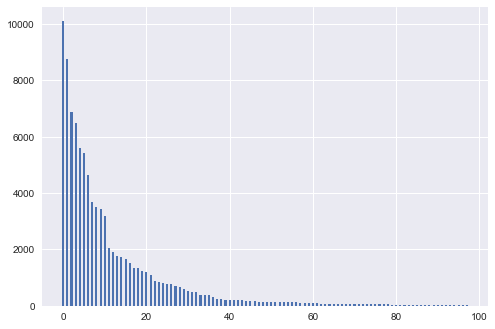

In [11]:
# plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
# plt.rcParams['axes.unicode_minus'] = False 
plt.style.use('seaborn')
plt.bar(range(y_series.value_counts().index.shape[0]),height=y_series.value_counts().values, width=0.5)
plt.show()
# plt.savefig('y_count.png')

In [12]:
plt.scatter(small_train_df[locate_fea[0]],small_train_df[locate_fea[1]],c = y, cmap='coolwarm')
plt.savefig('locate_map.png')

In [13]:
plt.scatter(test_df[locate_fea[0]],test_df[locate_fea[1]], cmap='coolwarm')
plt.savefig('test_location.png')
#分布基本一致哈

In [14]:
train_df['address'] #NLP - w2v,ngram,tf-idf

0                                        海天一路碧海佳园(正北48.38米)
1                                     太公岛三路华安大酒店(东南102.04米)
2                                  太公岛一路海印蓝湾接待中心(东北126.18米)
3                                    太公岛三路海燕活海鲜批发(东北18.09米)
4                                      山海天路农夫田歌生鲜(东北18.13米)
                                ...                        
480019                            日照市五莲县弘丰育才水韵东北约81米(东北71米)
480020        日照市东港区海天三路与佳海路交叉口东北角100米正北方向130米顺达汽修汽配(西北20米)
480021                               日照市东港区后官庄村村民委员会(西南99米)
480022                              山东省日照市东港区秦楼街道临沂路日照市技师学院
480023    日照市东港区海滨四路与连云港路交汇口南行60米路西正东方向61米水悦城西南约103米(西南93米)
Name: address, Length: 480024, dtype: object

In [15]:
train_df['event_desc'] #NLP - w2v,ngram,tf-idf

0                              海天一路碧海家园道路不结
1                      济南路与北京路交叉口往东180米处有垃圾
2                                济南路与山东路交叉口
3              太公岛三路：太公岛三路老船长饭店处人行道上，积存垃圾渣土
4         山海天路与佳海路交口向北约30米路西农夫田歌门东绿化带里有垃圾袋。
                        ...                
480019                 育才路与莱阳路交汇处桥西头中间道路破损。
480020                      学林路文德一区南沿街有杂物堆放
480021                    山海路南博文路西100米绿地有石块
480022                 临沂路东高新七路以北40米，绿地内有枯枝
480023              瑞阳路与连云港路交汇处向南250米路西动物粪便
Name: event_desc, Length: 480024, dtype: object

检查:
1. 训练集的类别在测试集是否都存在
2. 是否有测试集的类别不存在于训练集

In [15]:
tr_y = train_df[col].value_counts()
te_y = test_df[col].value_counts()
te_y = np.array([te_y[k] if k in te_y.index else -1 for k in tr_y.index]) 

Top 10 counts in train [('信息采集员上报', 348977), ('随手拍', 93609), ('双月会战', 18216), ('区指挥中心移交', 1230), ('城管大排查', 922), ('视频上报', 570), ('随手拍活动', 536), ('市长热线', 279), ('网格员上报', 175), ('城市大脑上报', 6)]
Top 10 counts in test [ 6.133000e+04  2.031800e+04  1.779800e+04 -1.744885e+04 -1.744885e+04
 -1.744885e+04  4.280000e+02  7.600000e+01 -1.744885e+04  2.700000e+01]


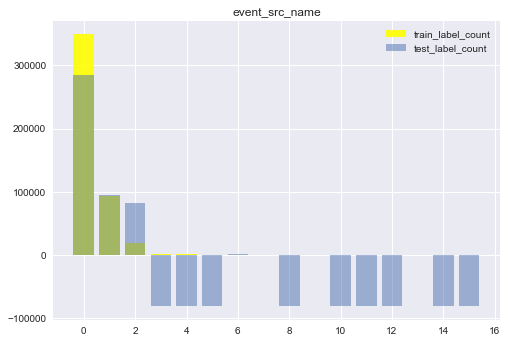

Top 10 counts in train [('市容环境', 274165), ('园林绿化设施', 46498), ('街面秩序', 39572), ('公用设施', 34674), ('宣传广告', 18709), ('市容环境设施', 15834), ('交通设施', 13868), ('城市养犬管理', 9616), ('施工管理', 6997), ('突发事件', 2689)]
Top 10 counts in test [4.9699e+04 1.6939e+04 1.5767e+04 8.8010e+03 2.6970e+03 2.3990e+03
 2.6820e+03 3.0000e+00 7.7000e+02 9.0000e+01]


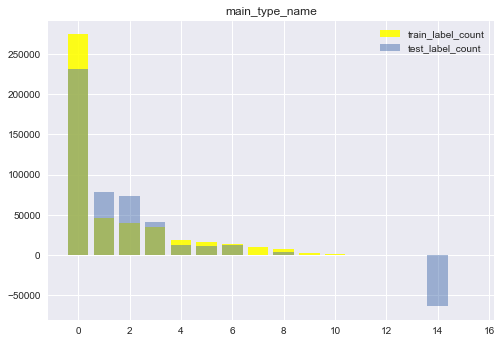

Top 10 counts in train [('暴露垃圾', 57562), ('动物尸体、粪便', 53424), ('道路不洁', 42415), ('道路破损', 23659), ('绿地脏乱', 22110), ('人行道及附属设施破损', 15888), ('绿化弃料', 14845), ('行道树', 13308), ('非法小广告', 13001), ('公共绿地 （公园、花池）', 12801)]
Top 10 counts in test [ 5475. 13742.  6556.  3117.  4987.  6682.  2393.  8838.  2173.  5137.]


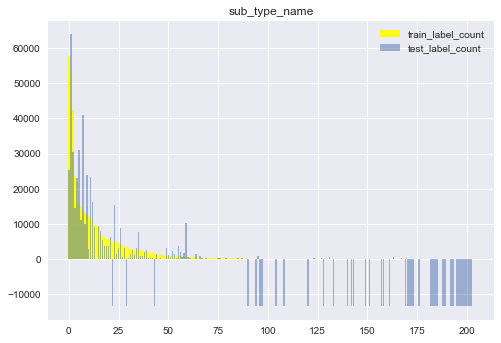

Top 10 counts in train [('东港区', 208516), ('莒县', 53887), ('高新区', 49194), ('开发区', 48366), ('岚山区', 46426), ('五莲县', 41256), ('山海天旅游度假区', 16887), ('日照市岚山区', 4)]
Top 10 counts in test [ 45131.    9173.    9364.   10642.   12161.   10054.    3475.  -10425.8]


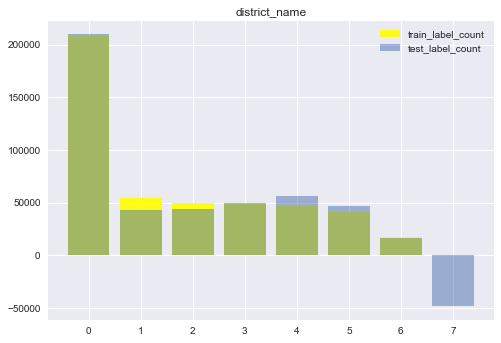

Top 10 counts in train [('城镇社区', 53589), ('香河社区', 18869), ('高新社区', 18121), ('北京路社区', 13991), ('江豪社区', 12193), ('芙蓉社区', 11260), ('丽阳社区', 9553), ('幸福社区', 9492), ('碧海路社区', 9029), ('富强社区', 8564)]
Top 10 counts in test [9110. 3477. 3490. 2764. 2397. 2555. 2230. 1221. 1847. 1949.]


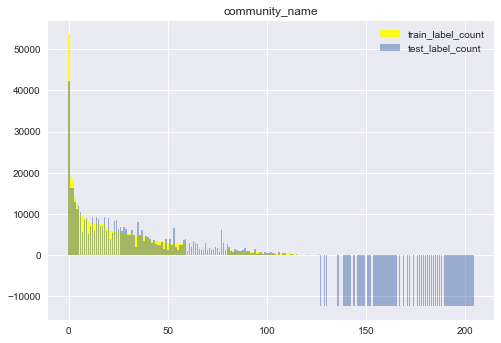

Top 10 counts in train [('城镇社区', 22857), ('日照街道网格四', 13620), ('秦楼街道网格二', 10895), ('石臼街道网格六', 9552), ('日照街道网格三', 7622), ('日照街道网格二', 6843), ('北京路社区', 6672), ('洪凝街道网格三', 6631), ('高新社区', 6351), ('秦楼街道网格四', 6256)]
Top 10 counts in test [-1142.85  5236.    4421.    1881.    3317.    2779.   -1142.85  1979.
 -1142.85  2130.  ]


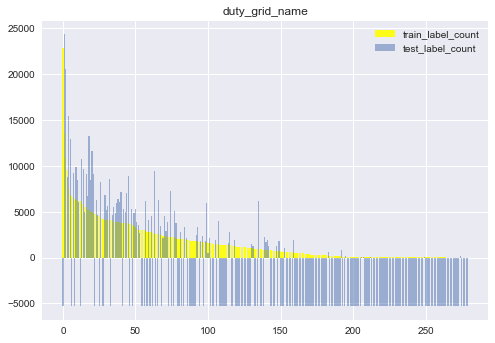

Top 10 counts in train [('街道', 328011), ('区级', 92166), ('市级', 44359)]
Top 10 counts in test [40108 33192 26700]


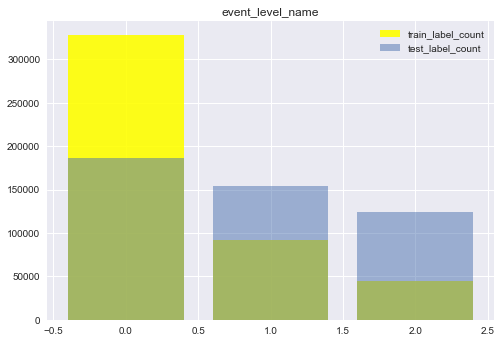

Top 10 counts in train [('北京路街道刘琴', 4540), ('徐浩', 4335), ('张福财', 4124), ('姜万梅', 4075), ('牟文龙', 4008), ('胡斌', 3982), ('范晓强', 3929), ('邹董振', 3906), ('陶迪', 3771), ('孙玉', 3748)]
Top 10 counts in test [678. 559.  56. 616.  73. 615. 244. 592. 247.  49.]


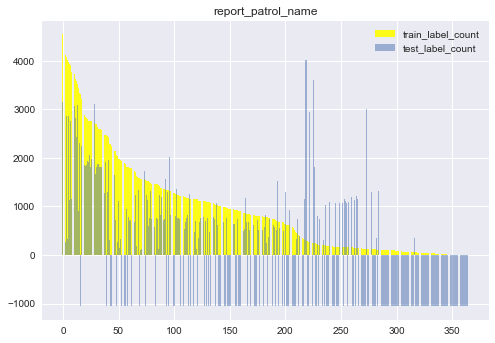

Top 10 counts in train [('东港区', 165659), ('莒县', 53887), ('高新区', 48420), ('开发区', 46813), ('岚山区', 46430), ('日照市', 46421), ('五莲县', 41257), ('山海天旅游度假区', 15649)]
Top 10 counts in test [30705  9173  9108 10335 12161 15386 10053  3079]


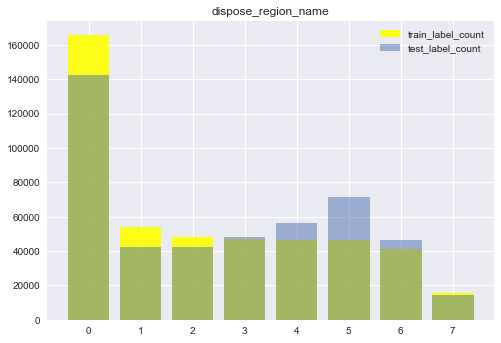

In [16]:
for i,col in enumerate(cate_fea):
    plt.figure()
    tr_y = clean_tr[col].value_counts()
    te_y = test_df[col].value_counts()
    #文字特征居多，需要观察一下分布
    te_y = np.array([te_y[k] if k in te_y.index else -max(tr_y.values)/20 for k in tr_y.index]) #为比较训练集合测试集的分布差异,测试集中缺失的类别填充为负值
    plt.bar(range(tr_y.values.shape[0]),height=tr_y.values,label = 'train_label_count', alpha=0.9,color='yellow')
    plt.bar(range(tr_y.values.shape[0]),height=te_y*data_ratio,label = 'test_label_count', alpha=0.5)
    print('Top 10 counts in train',[item for item in tr_y.items()][:10])
    print('Top 10 counts in test',te_y[:10])
    plt.legend(loc='upper right')
    plt.title(col)
    plt.show()

In [56]:
#需要检查哪些值只在train而不在test